In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [2]:
data_path = '../../../Data/KU-HAR_time_domain_subsamples_20750x300.csv'
df = pd.read_csv(data_path)
df.head()

,0.0042305,-0.00028038,-0.013906,-0.0025436,0.027433,0.0583,0.05167,0.071857,0.080653,0.047917,...,-0.016692,-0.018566,-0.017361,-0.017919,-0.01668,-0.01665,-0.013097,0,300,1
0,0.012482,0.032496,0.067856,0.071552,0.078103,0.040353,-0.001059,-0.018580,-0.026813,-0.011280,...,-0.008210,-0.010408,-0.011459,-0.011747,-0.010394,-0.008070,-0.004354,0,300,2
1,0.012127,0.028458,0.062075,0.052611,0.022942,-0.010017,-0.023151,-0.028515,0.005036,0.008450,...,0.000915,0.000771,-0.002560,-0.003020,-0.004190,0.000215,0.000850,0,300,3
2,0.052964,0.074319,0.110670,0.108490,0.091825,0.056989,0.029337,-0.016724,-0.042265,-0.053983,...,-0.001209,0.002878,0.000663,0.000982,-0.002148,-0.009200,-0.010653,0,300,4
3,-0.020462,-0.030787,-0.008617,0.008906,0.045046,0.042136,0.045037,0.045182,0.025113,0.021730,...,-0.006369,-0.006614,-0.004698,-0.007279,-0.006861,-0.006161,-0.006113,0,300,5
4,0.039138,0.037687,0.022782,0.009661,-0.000885,-0.000630,-0.019837,-0.016246,-0.007580,0.001479,...,0.001930,0.004500,0.008865,0.011290,0.010965,0.010364,0.009872,0,300,6


In [3]:
# view first sensor data
r = df.loc[0, :].values 
acx, acy, acz, gyx, gyy, gyz, label, _, ID = r[:300], r[300:600], r[600:900], r[900:1200], r[1200:1500], r[1500:1800], r[1800], r[1801], r[1802]

In [4]:
x = range(300)
rdf = pd.DataFrame({'accelX': acx, 'accelY': acy, 'accelZ': acz, 'GyroX': gyx, 'GyroY': gyy, 'GyroZ': gyz, 'frame':x})
sensor_df = pd.melt(rdf, id_vars=['frame'], value_vars=['accelX', 'accelY', 'accelZ', 'GyroX', 'GyroY', 'GyroZ'])
sensor_df.head()

,frame,variable,value
0,0,accelX,0.012482
1,1,accelX,0.032496
2,2,accelX,0.067856
3,3,accelX,0.071552
4,4,accelX,0.078103


In [5]:
plt.figure(figsize=(10, 6))
fig = px.line(sensor_df, x='frame', y='value', color='variable')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [53]:
# analyze first few x-axis accelarations 
subs = df.iloc[:5, :300].values
rdf = pd.DataFrame({'ID1': subs[0, :], 'ID2': subs[1, :], 'ID3': subs[2, :], 'ID4': subs[3, :], 'ID5': subs[4, :], 'frames': range(300)})
sensor_df = pd.melt(rdf, id_vars=['frames'], value_vars=['ID1', 'ID2', 'ID3', 'ID4', 'ID5'])
sensor_df.head()

,frames,variable,value
0,0,ID1,0.012482
1,1,ID1,0.032496
2,2,ID1,0.067856
3,3,ID1,0.071552
4,4,ID1,0.078103


In [54]:
plt.figure(figsize=(10, 6))
fig = px.line(sensor_df, x='frames', y='value', color='variable')
fig.show()

<Figure size 1000x600 with 0 Axes>

---
Visualize All class over all Sensor types

In [25]:
df_dict = {'accelX': [], 'accelY': [], 'accelZ': [], 'GyroX': [], 'GyroY': [], 'GyroZ': [], 'label': [], 'ID': []}

for i, r in df.iterrows():
    r = r.values 
    acx, acy, acz, gyx, gyy, gyz, label, _, ID = r[:300], r[300:600], r[600:900], r[900:1200], r[1200:1500], r[1500:1800], r[1800], r[1801], r[1802]
    # sub_df = pd.DataFrame({'accelX': acx, 'accelY': acy, 'accelZ': acz, 'GyroX': gyx, 'GyroY': gyy, 'GyroZ': gyz}, index=range(300))
    df_dict['accelX'].append(acx)
    df_dict['accelY'].append(acy)
    df_dict['accelZ'].append(acz)
    df_dict['GyroX'].append(gyx)
    df_dict['GyroY'].append(gyy)
    df_dict['GyroZ'].append(gyz)
    df_dict['label'].append(int(label))
    df_dict['ID'].append(int(ID))
    # subdf_list.append(sub_df)

full_df = pd.DataFrame(df_dict, index=df_dict['ID'])
full_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ,label,ID
2,"[0.012482, 0.032496, 0.067856, 0.071552, 0.078...","[-0.081862, -0.087494, -0.054918, -0.030374, -...","[0.0075474, 0.042496, 0.071386, 0.062229, 0.06...","[-0.024319, -0.025171, -0.023936, -0.022035, -...","[-0.010539, -0.0039851, 0.0015593, 0.011073, 0...","[-0.0079325, -0.0067652, -0.0033457, -0.003037...",0,2
3,"[0.012127, 0.028458, 0.062075, 0.052611, 0.022...","[-0.014245, 0.013939, 0.021417, 0.035381, 0.03...","[0.059104, 0.077302, 0.071605, 0.040671, 0.011...","[-0.031197, -0.030023, -0.028208, -0.030385, -...","[0.0069761, 0.012883, 0.017098, 0.020648, 0.01...","[-0.003934, -0.0027187, -0.0052953, -0.0097515...",0,3
4,"[0.052964, 0.074319, 0.11067, 0.10849, 0.09182...","[-0.043185, -0.016662, -0.0053775, 0.010687, 0...","[-0.019286, 0.0090208, 0.062509, 0.088431, 0.0...","[0.0011719, 0.0023993, -0.0012175, 0.0012269, ...","[-0.026508, -0.026477, -0.020948, -0.015568, -...","[0.0043762, 0.0048727, 0.007712, 0.0095564, 0....",0,4
5,"[-0.020462, -0.030787, -0.0086174, 0.0089065, ...","[0.054955, 0.039589, 0.010204, -0.0080236, -0....","[-0.091741, -0.074799, -0.055399, -0.011008, 0...","[-0.02631, -0.026255, -0.027553, -0.031039, -0...","[0.00086743, -0.015774, -0.023115, -0.023046, ...","[-0.011875, -0.01436, -0.012757, -0.010605, -0...",0,5
6,"[0.039138, 0.037687, 0.022782, 0.0096612, -0.0...","[0.011263, 0.015195, 0.020231, 0.022397, 0.001...","[0.032535, 0.034359, 0.033884, 0.033403, 0.041...","[-0.020749, -0.021244, -0.025445, -0.027144, -...","[-0.0020231, 0.002309, 0.0049787, 0.0065309, 0...","[-0.009616, -0.0094463, -0.010087, -0.010154, ...",0,6


In [26]:
classes = ['Stand', 'Sit', 'Talk-sit', 'Talk-stand', 'Stand-sit', 'Lay', 'Lay-stand', 'Pick', 'Jump', 'Push-up', 'Sit-up', 'Walk', 'Walk-backward', 'Walk-circle', 'Run', 'Stair-up', 'Stair-down', 'Table-tennis']
class_dict = dict(zip(range(len(classes)), classes))
full_df['action'] = full_df['label'].map(class_dict) 

In [27]:
sampled_df = full_df.groupby("label").sample(n=1, random_state=123)
sampled_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ,label,ID,action
1752,"[0.014639, -0.00073895, -0.020524, -0.0028933,...","[0.0081189, -0.0091344, -0.013128, -0.025454, ...","[-0.043077, -0.032289, -0.013499, 0.0092147, 0...","[-0.0047986, -0.0052599, -0.0037484, -0.002599...","[0.010138, 0.0040046, 0.00033789, 0.00016955, ...","[0.0010977, 0.0015097, 0.00059303, 0.00012429,...",0,1752,Stand
2358,"[-0.019834, -0.034178, -0.0024999, 0.0050308, ...","[0.012308, 0.010212, -0.013072, 0.0032714, 0.0...","[-0.052151, -0.031293, -0.0022922, 0.026597, 0...","[0.00053757, 0.00033519, 0.00029509, 0.0005855...","[0.0018572, 0.0031396, 0.0031553, 0.0025447, 0...","[-0.00046721, -9.2098e-05, -0.00081678, 0.0008...",1,2358,Sit
9723,"[0.0077697, 0.027107, -0.015795, -0.032753, -0...","[0.0095274, 0.024773, 0.0035296, 0.011653, 0.0...","[-0.0045816, 0.0012459, -0.03096, -0.0059524, ...","[-0.0041002, -0.0052464, -0.0052524, -0.005481...","[0.010926, 0.0096007, 0.0077775, 0.0066697, 0....","[-0.0014981, -0.00031625, 0.002414, 0.0038329,...",2,9723,Talk-sit
12377,"[-0.97939, -1.1292, -1.1512, -1.2262, -1.14, -...","[0.37933, 0.28063, 0.27603, 0.16987, 0.081062,...","[0.94388, 0.90985, 1.0175, 1.1257, 1.1855, 1.2...","[0.23888, 0.2499, 0.26223, 0.27126, 0.26891, 0...","[-0.13227, -0.15729, -0.16508, -0.16644, -0.16...","[-0.065062, -0.063046, -0.058028, -0.039404, -...",3,12377,Talk-stand
14391,"[0.13164, 0.19345, 0.2554, 0.30559, 0.3439, 0....","[0.15214, 0.14635, 0.13283, 0.0869, 0.03745, -...","[-0.12656, -0.19702, -0.19369, -0.26083, -0.43...","[0.096926, 0.08593, 0.069437, 0.065161, 0.0553...","[-0.2073, -0.1847, -0.15843, -0.12972, -0.1101...","[-0.0079962, -0.011051, -0.015937, -0.017159, ...",4,14391,Stand-sit


In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [37]:
accelx_df = sampled_df.loc[:, ['accelX', 'ID', 'action']]

accelx_df = accelx_df.explode('accelX')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

,accelX,ID,action,frames
1752,0.014639,1752,Stand,0
1752,-0.000739,1752,Stand,1
1752,-0.020524,1752,Stand,2
1752,-0.002893,1752,Stand,3
1752,0.036876,1752,Stand,4


In [38]:
import plotly.express as px
# df = px.data.tips()
fig = px.histogram(accelx_df, x="accelX", color="action", marginal="rug")
fig.show()

In [30]:
plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='accelX', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [31]:
accelx_df = sampled_df.loc[:, ['accelY', 'ID', 'action']]
accelx_df = accelx_df.explode('accelY')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='accelY', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [32]:
accelx_df = sampled_df.loc[:, ['accelZ', 'ID', 'action']]
accelx_df = accelx_df.explode('accelZ')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='accelZ', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [33]:
accelx_df = sampled_df.loc[:, ['GyroX', 'ID', 'action']]
accelx_df = accelx_df.explode('GyroX')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='GyroX', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [34]:
accelx_df = sampled_df.loc[:, ['GyroY', 'ID', 'action']]
accelx_df = accelx_df.explode('GyroY')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='GyroY', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

In [35]:
accelx_df = sampled_df.loc[:, ['GyroZ', 'ID', 'action']]
accelx_df = accelx_df.explode('GyroZ')
accelx_df['frames'] = np.array([range(300),]*18).reshape((-1))
accelx_df.head()

plt.figure(figsize=(10, 6))
fig = px.line(accelx_df, x='frames', y='GyroZ', color='action')
fig.show()

<Figure size 1000x600 with 0 Axes>

---
Visualize Orignal Vs. Standarazied signals

In [3]:
subdf_list = []
label_dict = {'ID': [], 'label': []}

for i, r in df.iterrows():
    r = r.values 
    acx, acy, acz, gyx, gyy, gyz, label, _, ID = r[:300], r[300:600], r[600:900], r[900:1200], r[1200:1500], r[1500:1800], r[1800], r[1801], r[1802]
    sub_df = pd.DataFrame({'accelX': acx, 'accelY': acy, 'accelZ': acz, 'GyroX': gyx, 'GyroY': gyy, 'GyroZ': gyz}, index=[int(ID),]*300)
    label_dict['label'].append(int(label))
    label_dict['ID'].append(int(ID))
    subdf_list.append(sub_df)
    label_df = pd.DataFrame(label_dict)
    label_df.set_index('ID')

full_df = pd.concat(subdf_list)
full_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ
2,0.012482,-0.081862,0.007547,-0.024319,-0.010539,-0.007933
2,0.032496,-0.087494,0.042496,-0.025171,-0.003985,-0.006765
2,0.067856,-0.054918,0.071386,-0.023936,0.001559,-0.003346
2,0.071552,-0.030374,0.062229,-0.022035,0.011073,-0.003037
2,0.078103,-0.012147,0.066126,-0.021341,0.020339,-0.005582


In [4]:
label_df.head()

,ID,label
0,2,0
1,3,0
2,4,0
3,5,0
4,6,0


In [20]:
fdf1 = full_df.reset_index(0)
fdf1['action'] = fdf1['index'].map(dict(zip(label_df['ID'].values, label_df['label'].values)))
fdf1.head()

,index,accelX,accelY,accelZ,GyroX,GyroY,GyroZ,action
0,2,0.012482,-0.081862,0.007547,-0.024319,-0.010539,-0.007933,0
1,2,0.032496,-0.087494,0.042496,-0.025171,-0.003985,-0.006765,0
2,2,0.067856,-0.054918,0.071386,-0.023936,0.001559,-0.003346,0
3,2,0.071552,-0.030374,0.062229,-0.022035,0.011073,-0.003037,0
4,2,0.078103,-0.012147,0.066126,-0.021341,0.020339,-0.005582,0


In [16]:
fig = px.box(fdf1.sample(frac=0.2), x="accelX", y="action")
fig.show()

array([    2,     3,     4, ..., 20748, 20749, 20750], dtype=int64)

20749 20749


In [ ]:
# plot box plot to vis. different data variation 


In [ ]:
# plot acceleration data in 3D scatter plot with class label 

In [ ]:
# plot gyro data in 3D scatter plot with class labels

In [38]:
import random

sample_IDs = random.sample(set(full_df.index.unique()), k=10)
sample_IDs

[10823, 7480, 3187, 3683, 1720, 4979, 12715, 2175, 15915, 18076]

In [39]:
norm_full_df = full_df.copy()
df_mean, df_std = norm_full_df.mean(), norm_full_df.std()
norm_full_df = (norm_full_df-df_mean)/df_std
norm_full_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ
2,0.012741,-0.024458,0.048560,-0.000371,-0.036025,-0.045007
2,0.012746,-0.024459,0.048566,-0.000372,-0.036022,-0.045007
2,0.012754,-0.024453,0.048572,-0.000371,-0.036019,-0.045005
2,0.012755,-0.024448,0.048570,-0.000370,-0.036014,-0.045005
2,0.012756,-0.024444,0.048571,-0.000369,-0.036010,-0.045006


In [41]:
frames = np.array([range(300),]*10).reshape((-1))
original_sdf = full_df.loc[sample_IDs]
original_sdf['format'] = 'original'
original_sdf['frames'] = frames
norm_sdf = norm_full_df.loc[sample_IDs]
norm_sdf['format'] = 'standarized'
norm_sdf['frames'] = frames

comb_df = pd.concat((original_sdf, norm_sdf), axis=0)
comb_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ,format,frames
10823,-0.501660,-0.330800,0.65233,-1.1963,-0.14071,-0.32342,original,0
10823,-0.378480,-0.242640,0.87135,-1.1482,-0.15082,-0.30715,original,1
10823,-0.297510,-0.078243,1.00790,-1.1163,-0.14571,-0.29299,original,2
10823,-0.149610,0.167940,1.05760,-1.0771,-0.12605,-0.27638,original,3
10823,-0.040431,0.288690,1.03680,-1.0454,-0.11322,-0.26966,original,4


In [44]:
sensor_df = pd.melt(comb_df, id_vars=['frames', 'format'], value_vars=['accelX', 'accelY', 'accelZ', 'GyroX', 'GyroY', 'GyroZ'])
sensor_df.head()

,frames,format,variable,value
0,0,original,accelX,-0.501660
1,1,original,accelX,-0.378480
2,2,original,accelX,-0.297510
3,3,original,accelX,-0.149610
4,4,original,accelX,-0.040431


In [51]:
plt.figure(figsize=(10, 6))
# fig = px.line(sensor_df.loc[sensor_df['format']=='original', :], x='frames', y='value', color='variable')
# fig = px.line(sensor_df.loc[sensor_df['format']=='standarized', :], x='frames', y='value', color='variable', line_dash='dot')
fig = px.line(sensor_df, x='frames', y='value', color='variable', line_dash='format')
fig.show()

<Figure size 1000x600 with 0 Axes>

---

In [5]:
subdf_list = []
label_dict = {'ID': [], 'label': []}

for i, r in df.iterrows():
    r = r.values 
    acx, acy, acz, gyx, gyy, gyz, label, _, ID = r[:300], r[300:600], r[600:900], r[900:1200], r[1200:1500], r[1500:1800], r[1800], r[1801], r[1802]
    sub_df = pd.DataFrame({'accelX': acx, 'accelY': acy, 'accelZ': acz, 'GyroX': gyx, 'GyroY': gyy, 'GyroZ': gyz}, index=[int(ID),]*300)
    label_dict['label'].append(int(label))
    label_dict['ID'].append(int(ID))
    subdf_list.append(sub_df)
    label_df = pd.DataFrame(label_dict)
    label_df.set_index('ID')

full_df = pd.concat(subdf_list)
full_df.head()

,accelX,accelY,accelZ,GyroX,GyroY,GyroZ
2,0.012482,-0.081862,0.007547,-0.024319,-0.010539,-0.007933
2,0.032496,-0.087494,0.042496,-0.025171,-0.003985,-0.006765
2,0.067856,-0.054918,0.071386,-0.023936,0.001559,-0.003346
2,0.071552,-0.030374,0.062229,-0.022035,0.011073,-0.003037
2,0.078103,-0.012147,0.066126,-0.021341,0.020339,-0.005582


<AxesSubplot:>

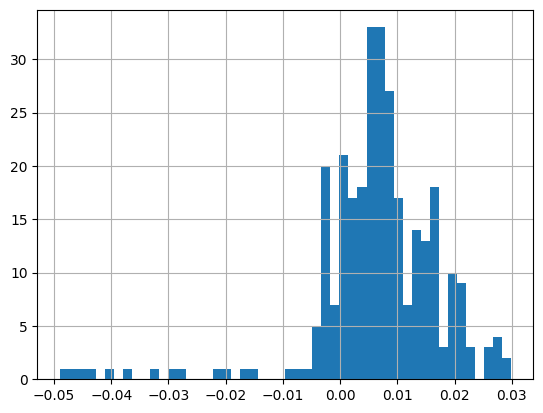

In [24]:
full_df.loc[700, 'GyroX'].hist(bins=50)

In [8]:
! pip install feature-engine

     -------------------------------------- 276.6/276.6 kB 1.2 MB/s eta 0:00:00


In [12]:
from feature_engine import transformation as vt

tf = vt.YeoJohnsonTransformer(variables=list(full_df.columns))
tf.fit(full_df)
trans_df = tf.transform(full_df)

<AxesSubplot:>

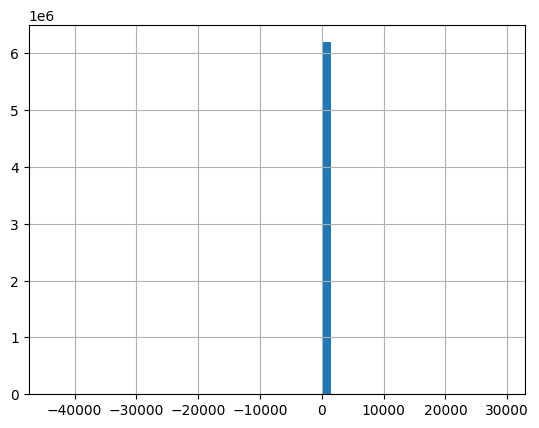

In [13]:
trans_df['GyroX'].hist(bins=50)

In [14]:
full_df.max()

accelX    147630.0
accelY    189630.0
accelZ     93915.0
GyroX      25781.0
GyroY      74050.0
GyroZ      90314.0
dtype: float64

In [15]:
full_df.min()

accelX    -81043.0
accelY    -32337.0
accelZ   -173920.0
GyroX     -50002.0
GyroY     -39446.0
GyroZ     -17540.0
dtype: float64